## Data exploration

#### reference from Pedro Marcelino

##### 目的: 藉由60多個房屋feature，去預測售價SalePrice

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings

In [3]:
%matplotlib inline

In [4]:
df_train = pd.read_csv('../Datasets/Input/train.csv')

In [5]:
df_train.shape

(1460, 81)

In [6]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

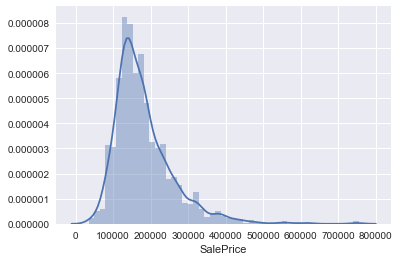

In [8]:
sns.distplot(df_train["SalePrice"])

In [9]:
df_train['SalePrice'].skew()

1.8828757597682129

In [10]:
df_train['SalePrice'].kurt()

6.5362818600645287

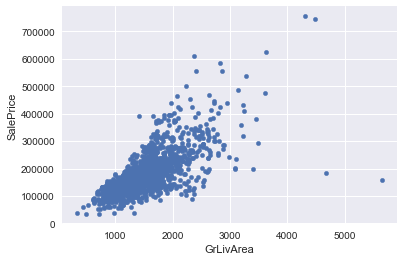

In [11]:
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice')

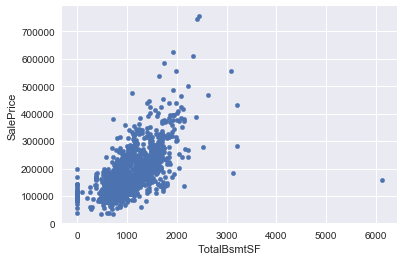

In [12]:
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice')

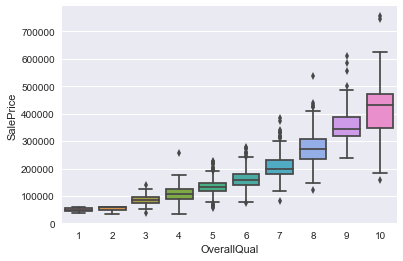

In [13]:
var = "OverallQual"
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
fig = sns.boxplot(x=var, y="SalePrice", data=data)

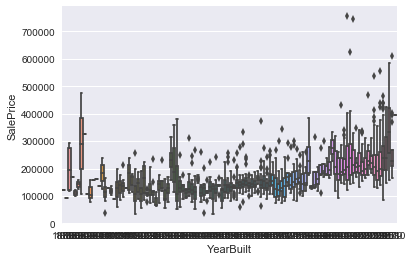

In [14]:
var = "YearBuilt"
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
fig = sns.boxplot(y="SalePrice", x=var, data=data)

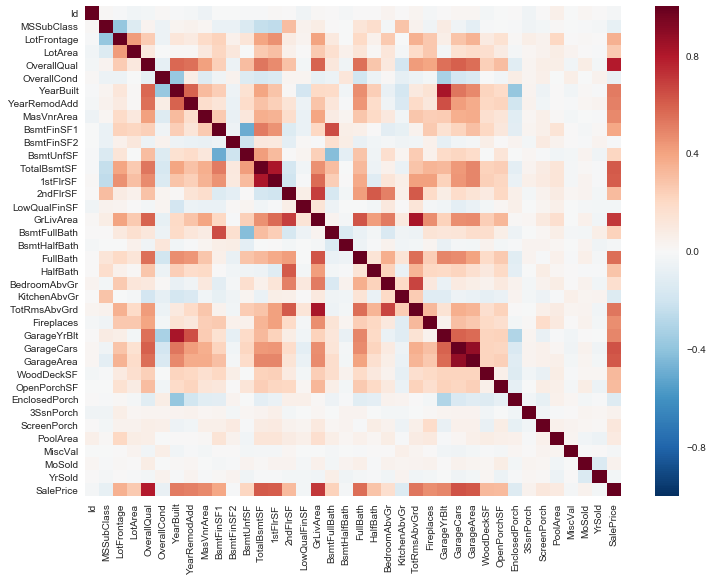

In [15]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9)) #調整畫布大小
sns.heatmap(corrmat)

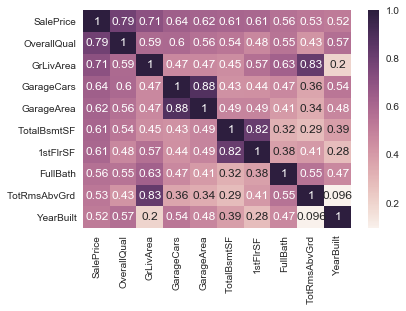

In [16]:
cols = corrmat.nlargest(10, "SalePrice")["SalePrice"].index
cm = np.corrcoef(df_train[cols].values.T)
hm = sns.heatmap(cm, yticklabels=cols.values, xticklabels=cols.values, annot_kws={"size":12}, annot=True)

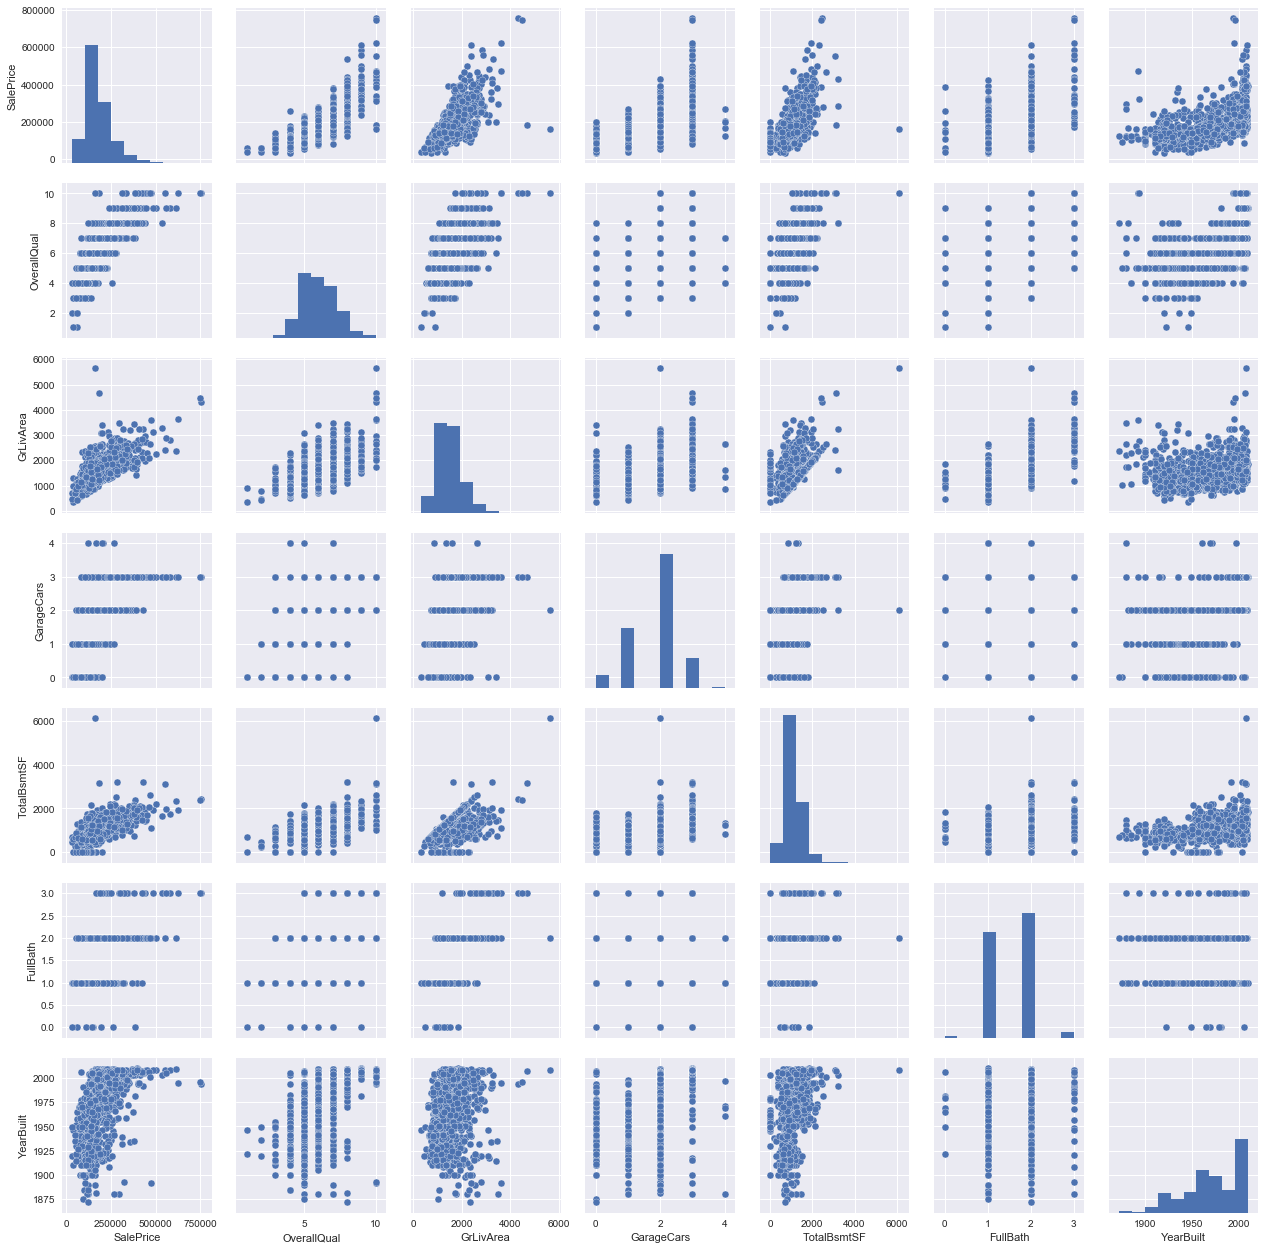

In [17]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols])

## Missing Data

In [18]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=["Total", "Percentage"])
missing_data.head(20)

,Total,Percentage
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [19]:
df_train.shape

(1460, 81)

In [20]:
df_train = df_train.drop(missing_data[missing_data["Total"] > 1].index, axis=1)

In [21]:
df_train.shape

(1460, 63)

In [22]:
df_train = df_train.drop(df_train.loc[df_train["Electrical"].isnull()].index)

In [23]:
df_train.shape

(1459, 63)

In [24]:
df_train.isnull().sum().max()

0

## Outlier

In [25]:
salePrice_scaled = StandardScaler().fit_transform(df_train["SalePrice"][:, np.newaxis])

C:\Users\CJSCOPE\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [26]:
salePrice_scaled

array([[ 0.34704187],
       [ 0.0071701 ],
       [ 0.53585953],
       ..., 
       [ 1.07713679],
       [-0.48847623],
       [-0.42081658]])

In [27]:
salePrice_scaled.shape

(1459, 1)

In [28]:
salePrice_scaled[:, np.newaxis]

array([[[ 0.34704187]],

       [[ 0.0071701 ]],

       [[ 0.53585953]],

       ..., 
       [[ 1.07713679]],

       [[-0.48847623]],

       [[-0.42081658]]])

In [29]:
salePrice_scaled[:, np.newaxis].shape   # newaxis就是多加維度

(1459, 1, 1)

In [30]:
salePrice_scaled[:,0]

array([ 0.34704187,  0.0071701 ,  0.53585953, ...,  1.07713679,
       -0.48847623, -0.42081658])

In [31]:
salePrice_scaled[:,0].shape

(1459,)

In [32]:
salePrice_scaled[:,0].argsort()

array([ 495,  916,  968, ..., 1169, 1182,  691], dtype=int64)

In [33]:
low_range = salePrice_scaled[salePrice_scaled[:,0].argsort()][:10]
high_range = salePrice_scaled[salePrice_scaled[:,0].argsort()][-10:]

In [34]:
print("outer range (low) of the distribution:")
print(low_range)
print("outer range (high) of the distribution:")
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]
outer range (high) of the distribution:
[[ 3.82758058]
 [ 4.0395221 ]
 [ 4.49473628]
 [ 4.70872962]
 [ 4.728631  ]
 [ 5.06034585]
 [ 5.42191907]
 [ 5.58987866]
 [ 7.10041987]
 [ 7.22629831]]


In [35]:
# 先看看跟面積的關係
var = "GrLivArea"
data = pd.concat([df_train["SalePrice"], df_train[var]], axis=1)
data

,SalePrice,GrLivArea
0,208500,1710
1,181500,1262
2,223500,1786
3,140000,1717
4,250000,2198
5,143000,1362
6,307000,1694
7,200000,2090
8,129900,1774
9,118000,1077


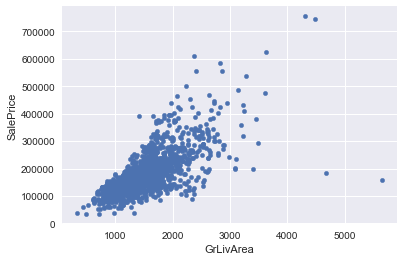

In [36]:
data.plot.scatter(x=var, y="SalePrice")

##### 右邊兩點: 面積大但是價格不高，可能是特例，視作outlier。
##### 上方兩點: 為salePrice正規化後，值為7.~的obs。不過似乎有依著趨勢方向，故先保留

In [37]:
# deleting points
df_train.sort_values(by="GrLivArea", ascending=False)[:2]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,160000
523,524,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2007,New,Partial,184750


In [38]:
df_train[df_train['Id'] == 1299].index

Int64Index([1298], dtype='int64')

In [39]:
# 丟掉Id為1299 & 524的兩個項目
df_train = df_train.drop(df_train[df_train["Id"]==1299].index)
df_train = df_train.drop(df_train[df_train["Id"]==524].index)

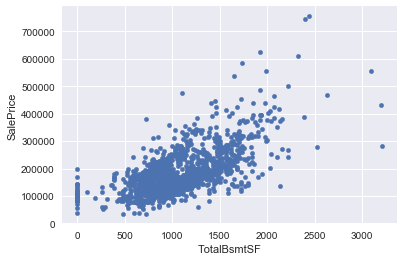

In [40]:
# 再看看跟Basement的關係
var = "TotalBsmtSF"
data = pd.concat([df_train["SalePrice"], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice')

## Statistical Assumptions

#### 1. Normality

In [41]:
## 一些檢定方法需要normality的性質，不過此data size > 200，已經消弭就算不符合normal的前提。
## 不過normality可以解決許多問題，例如: heteroscedacity異方差
## When we talk about normality what we mean is that the data should look like a normal distribution. 
## This is important because several statistic tests rely on this (e.g. t-statistics). In this exercise 
## we'll just check univariate normality for 'SalePrice' (which is a limited approach). Remember that 
## univariate normality doesn't ensure multivariate normality (which is what we would like to have), but 
## it helps. Another detail to take into account is that in big samples (>200 observations) normality is 
## not such an issue. However, if we solve normality, we avoid a lot of other problems (e.g. heteroscedacity) 
## so that's the main reason why we are doing this analysis.

#### 2. Homoscedasticity

In [42]:
## I just hope I wrote it right. Homoscedasticity refers to the 'assumption that dependent variable(s) 
## exhibit equal levels of variance across the range of predictor variable(s)' (Hair et al., 2013). 
## Homoscedasticity is desirable because we want the error term to be the same across all values of the independent variables.

#### 3. Linearity

In [43]:
##The most common way to assess linearity is to examine scatter plots and search for linear patterns. 
## If patterns are not linear, it would be worthwhile to explore data transformations. However, we'll 
## not get into this because most of the scatter plots we've seen appear to have linear relationships.

#### 4. Absence of correlated errors

In [44]:
## 回歸式中的epison之間獨立與否
## Correlated errors, like the definition suggests, happen when one error is correlated to another. 
## For instance, if one positive error makes a negative error systematically, it means that there's 
## a relationship between these variables. This occurs often in time series, where some patterns are 
## time related. We'll also not get into this. However, if you detect something, try to add a variable 
## that can explain the effect you're getting. That's the most common solution for correlated errors.

#### 檢驗

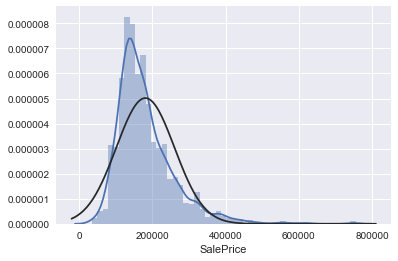

In [45]:
## histogram
sns.distplot(df_train["SalePrice"], fit=stats.norm)

((array([-3.30456314, -3.04731426, -2.90425334, ...,  2.90425334,
          3.04731426,  3.30456314]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000], dtype=int64)),
 (74240.99917988207, 180942.13864104328, 0.93205203658898839))

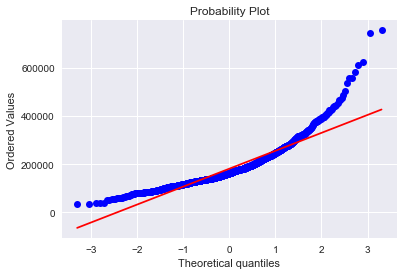

In [46]:
stats.probplot(df_train["SalePrice"], plot = plt)

In [47]:
# Ok, 'SalePrice' is not normal. It shows 'peakedness', positive skewness and does not follow the diagonal line.

In [48]:
## Applying log transformation
df_train["SalePrice"] = np.log(df_train["SalePrice"])

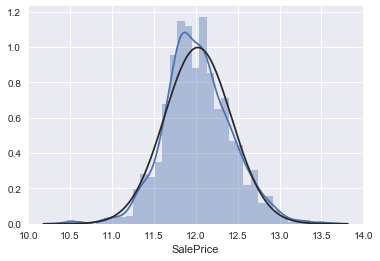

In [49]:
## 轉換後再做一次圖
sns.distplot(df_train["SalePrice"], fit=norm)

((array([-3.30456314, -3.04731426, -2.90425334, ...,  2.90425334,
          3.04731426,  3.30456314]),
  array([ 10.46024211,  10.47194981,  10.54270639, ...,  13.34550693,
          13.5211395 ,  13.53447303])),
 (0.3986736383757874, 12.024005414589174, 0.99540276336426836))

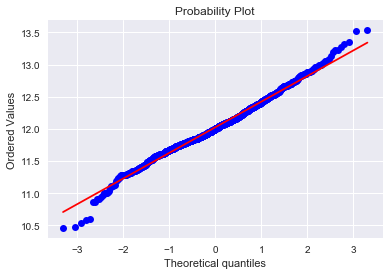

In [50]:
stats.probplot(df_train["SalePrice"], plot=plt)

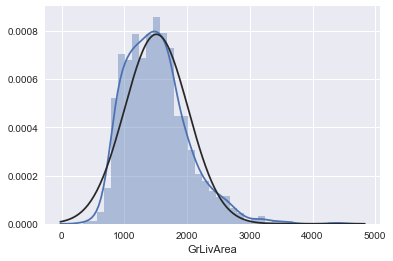

In [53]:
sns.distplot(df_train["GrLivArea"], fit=norm)

((array([-3.30456314, -3.04731426, -2.90425334, ...,  2.90425334,
          3.04731426,  3.30456314]),
  array([ 334,  438,  480, ..., 3627, 4316, 4476], dtype=int64)),
 (495.86487962489463, 1510.5456417295816, 0.97441411580652382))

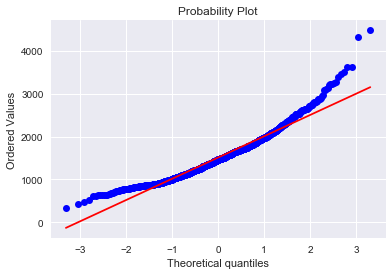

In [55]:
stats.probplot(df_train["GrLivArea"], plot=plt)

In [56]:
## 發現有點skewness，也做log轉換吧!
df_train["GrLivArea"] = np.log(df_train["GrLivArea"])

((array([-3.30456314, -3.04731426, -2.90425334, ...,  2.90425334,
          3.04731426,  3.30456314]),
  array([ 5.81114099,  6.08221891,  6.1737861 , ...,  8.19616114,
          8.37008433,  8.40648507])),
 (0.33042884783500531, 7.2660415064026029, 0.99812429980558626))

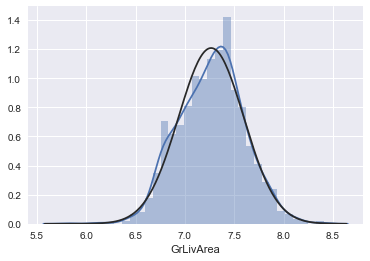

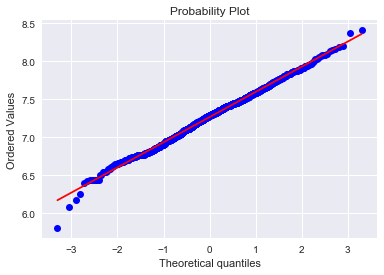

In [58]:
sns.distplot(df_train["GrLivArea"], fit=norm)
plt.figure() # 先做一張圖
stats.probplot(df_train["GrLivArea"], plot=plt)

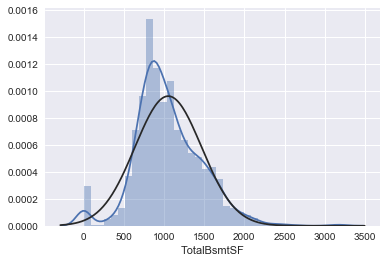

In [59]:
sns.distplot(df_train["TotalBsmtSF"], fit=norm)

((array([-3.30456314, -3.04731426, -2.90425334, ...,  2.90425334,
          3.04731426,  3.30456314]),
  array([   0,    0,    0, ..., 3094, 3200, 3206], dtype=int64)),
 (408.02329853970258, 1052.995881949211, 0.98214359337220603))

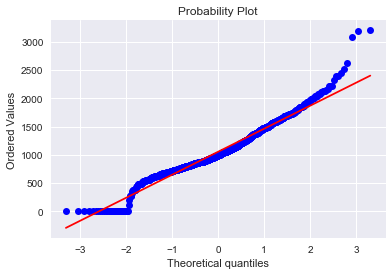

In [60]:
stats.probplot(df_train["TotalBsmtSF"], plot=plt)

In [74]:
## Problem: 有點skewness，不過Bsmt是0的部分不能做log轉換
## 新增一個column為"是否有Bsmt"
df_train["hasBsmt"] = pd.Series(0, index=df_train.index) # 創一行 0 的 column
df_train.loc[df_train["TotalBsmtSF"]>0, "hasBsmt"] = 1

In [79]:
df_train.loc[:, ["TotalBsmtSF", "hasBsmt"]][100:110]

,TotalBsmtSF,hasBsmt
100,1610,1
101,741,1
102,0,0
103,1226,1
104,1040,1
105,1053,1
106,641,1
107,789,1
108,793,1
109,1844,1


In [80]:
## log transform那些有值得TotalBsmt
df_train.loc[df_train["hasBsmt"]==1, "TotalBsmtSF"] = np.log(df_train["TotalBsmtSF"])

C:\Users\CJSCOPE\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


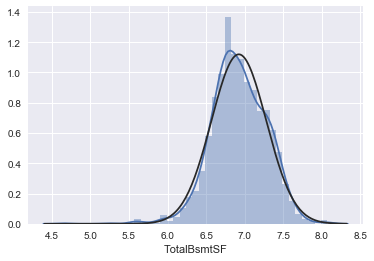

In [84]:
sns.distplot(df_train[df_train["TotalBsmtSF"]>0]["TotalBsmtSF"], fit=norm)

((array([-3.29734785, -3.03957662, -2.89619317, ...,  2.89619317,
          3.03957662,  3.29734785]),
  array([ 4.65396035,  5.24702407,  5.5759491 , ...,  8.03722003,
          8.07090609,  8.07277933])),
 (0.35386497225381225, 6.9236618651603168, 0.99123729396083782))

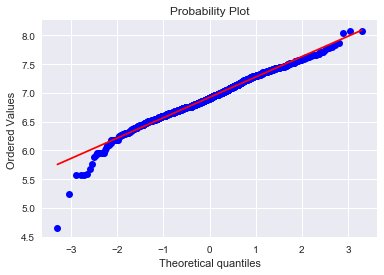

In [88]:
stats.probplot(df_train[df_train["TotalBsmtSF"]>0]["TotalBsmtSF"], plot=plt)

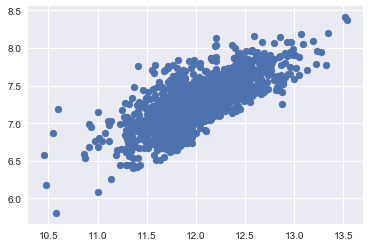

In [90]:
## 再看看 Scatter plot，是否仍有homoscedasticity
##The best approach to test homoscedasticity for two metric variables is graphically. Departures from an equal 
##dispersion are shown by such shapes as cones (small dispersion at one side of the graph, large dispersion at 
##the opposite side) or diamonds (a large number of points at the center of the distribution).
plt.scatter(df_train["SalePrice"], df_train["GrLivArea"])

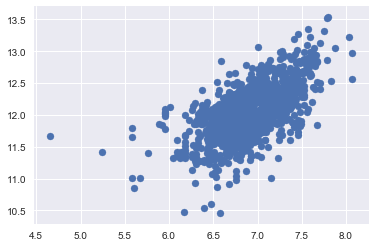

In [92]:
## Bsmt的
plt.scatter(df_train[df_train["TotalBsmtSF"]>0]["TotalBsmtSF"], df_train[df_train["TotalBsmtSF"]>0]["SalePrice"])

In [102]:
df_train.shape

(1457, 64)

In [101]:
pd.get_dummies(df_train).shape  ## dummy variables

(1457, 222)